In [1]:
import pandas as pd

review_file = pd.read_csv('amazon_reviews_multilingual_US_v1_00.tsv', sep = '\t', quoting = 3)

In [3]:
review_file.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [4]:
review_file = review_file.drop(['marketplace', 'customer_id', 'product_id', 'product_parent', 'product_title', 
              'vine', 'verified_purchase', 'helpful_votes', 'total_votes', ], axis=1)

In [5]:
review_file['review_date'] = pd.to_datetime(review_file['review_date'])

In [6]:
review_file.loc[review_file.duplicated()]

,review_id,product_category,star_rating,review_headline,review_body,review_date


In [7]:
review_file = review_file.drop_duplicates()

In [8]:
review_file = review_file.dropna()

In [10]:
review_file.shape

(6931017, 6)

In [11]:
drop_categories = ['Mobile_Apps', 'Digital_Video_Download','Music', 'Digital_Ebook_Purchase', 'Digital_Music_Purchase']
mask_categories = ~review_file['product_category'].isin(drop_categories)
review_file = review_file[mask_categories]

In [13]:
drop_date = pd.to_datetime('2010-01-01')

# Select the rows that have a review date before the drop date
drop_mask = review_file['review_date'] < drop_date

# Drop the selected rows
review_file = review_file.drop(index=review_file[drop_mask].index)

In [15]:
review_file.to_csv('base_amazon_reviews.csv', index = False, sep = ',')

In [16]:
review_file['text'] = review_file['review_body'].astype(str).str.lower()

In [17]:
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,text
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw..."
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the..."
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...


In [19]:
review_file = review_file.drop(['text'], axis = 1)

In [20]:
review_file['review_text'] = review_file['review_body'].astype(str).str.lower()

In [21]:
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw..."
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the..."
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...


In [22]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anime\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [24]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

review_file['review_body_token'] = review_file['review_body'].apply(regexp.tokenize)

# Remove stopwords from the tokenized column
review_file['review_body_token'] = review_file['review_body_token'].apply(lambda x: [item for item in x if item not in stopwords])
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre..."
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim..."
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar..."
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,..."
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w..."


In [26]:
review_file['review_body_string'] = review_file['review_body_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token,review_body_string
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre...",hard write review book without expressing one ...
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim...",Poor horrific sad terrible laughable dimwitted...
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar...",This film much portrayal legend King Arthur sp...
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,...",There lot books last years take mental practic...
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w...",Three black male teens come age gang war zones...


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

review_file['polarity_scores'] = review_file['review_body_string'].apply(lambda x: sia.polarity_scores(x))

In [29]:
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token,review_body_string,polarity_scores
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre...",hard write review book without expressing one ...,"{'neg': 0.098, 'neu': 0.754, 'pos': 0.147, 'co..."
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim...",Poor horrific sad terrible laughable dimwitted...,"{'neg': 0.263, 'neu': 0.565, 'pos': 0.172, 'co..."
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar...",This film much portrayal legend King Arthur sp...,"{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'comp..."
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,...",There lot books last years take mental practic...,"{'neg': 0.014, 'neu': 0.783, 'pos': 0.203, 'co..."
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w...",Three black male teens come age gang war zones...,"{'neg': 0.211, 'neu': 0.544, 'pos': 0.245, 'co..."


In [32]:
review_file = pd.concat([review_file.drop(['polarity_scores'], axis=1), review_file['polarity_scores'].apply(pd.Series)], axis=1)
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token,review_body_string,neg,neu,pos,compound
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre...",hard write review book without expressing one ...,0.098,0.754,0.147,0.9634
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim...",Poor horrific sad terrible laughable dimwitted...,0.263,0.565,0.172,-0.9649
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar...",This film much portrayal legend King Arthur sp...,0.000,0.941,0.059,0.4215
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,...",There lot books last years take mental practic...,0.014,0.783,0.203,0.9824
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w...",Three black male teens come age gang war zones...,0.211,0.544,0.245,0.1779


In [34]:
review_file['sentiment'] = review_file['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')
review_file.head(5)SSss

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token,review_body_string,neg,neu,pos,compound,sentiment
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre...",hard write review book without expressing one ...,0.098,0.754,0.147,0.9634,positive
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim...",Poor horrific sad terrible laughable dimwitted...,0.263,0.565,0.172,-0.9649,negative
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar...",This film much portrayal legend King Arthur sp...,0.000,0.941,0.059,0.4215,positive
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,...",There lot books last years take mental practic...,0.014,0.783,0.203,0.9824,positive
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w...",Three black male teens come age gang war zones...,0.211,0.544,0.245,0.1779,positive


In [35]:
review_file.loc[review_file['compound'].idxmax()].values

array(['R31GKI9HWN7CHI', 'Books', 5,
       'A Synaesthetic Genius of Sound at Work on Musical Masterpieces!',
       'Geoff Emerick - A Synaesthetic Genius of Sound at Work on Musical Masterpieces!<br /><br />Geoff Emerick was the \\\\"Balance Engineer\\\\" / Sound Recorder / Mixing Desk Console man at EMI\'s Studios on Abbey Road in London, England who worked on all of The Beatles\' records from Revolver till the end. He is a genius! ... The Beatles would absolutely NOT have gotten their records to SOUND as good as they did without him. Before him, their records sounded great - not only because people like George Martin and Norman Smith (their earlier sound man at the controls) were also perfectionists, but because - let\'s face it - it was The Beatles! They are the greatest band in the world. Their music is majestic, magical, and timeless. Their lyrics, vocal harmonies, and rock energy are \\\\"second to none!\\\\" ... But before they got Geoff Emerick as their sound man, their outs

In [36]:
review_file.loc[review_file['compound'].idxmin()].values

array(['R2HG7O5DSG9Q2L', 'Books', 5,
       'The black bile that has always been a part of us. An inspired and painstaking work that is also a joy to read.',
       'As a lay person wanting to get informed on the history, the victims, the research and researchers, the politics, the science, and the oncology behind this truly remarkable disease, I could not have picked a better book. Quite an amazing feat of presenting information in such a lucid and well-organized manner. What enhances the appeal of the book is the style of writing. It manages to achieve the fine balance between keeping it accessible for the lay reader and providing sufficient detail. This means that you can keep returning to the book for details that you may otherwise gloss over in your first reading.<br /><br />This is literally a biography of cancer. It is also a commentary on the treatments pursued over the millennia, and of the people who have spent their lives in pursuing a treatment, a cure of the disease. It is

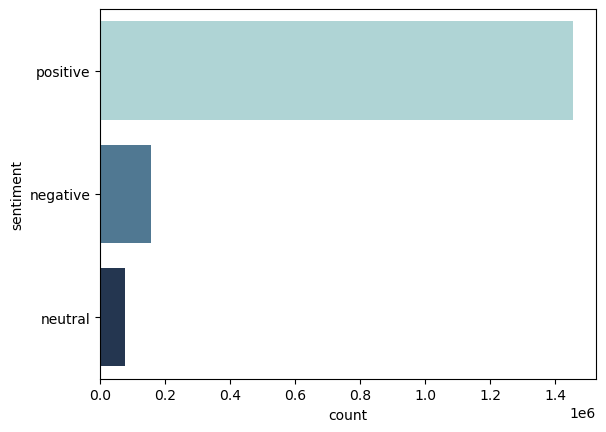

In [39]:
import seaborn as sns

sns.countplot(y = 'sentiment', 
             data = review_file, 
             palette = ['#A8DADC',"#457B9D", '#1D3557']
             );

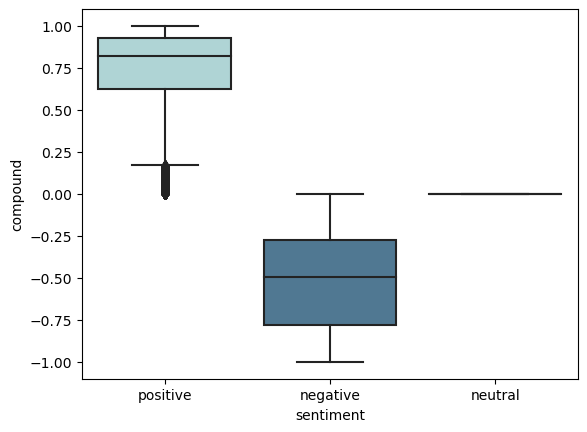

In [40]:
sns.boxplot(y = 'compound', 
            x = 'sentiment',
            palette = ['#A8DADC',"#457B9D", '#1D3557'], 
            data = review_file);

In [41]:
review_file.to_csv('sentiment_amazon_reviews.csv', index = False)

In [42]:
review_file.shape

(1685096, 14)

In [43]:
review_file['sentiment_value'] = review_file['compound'].apply(lambda x: 1 if x > 0 else 0 if x == 0 else -1)
review_file.head(5)

,review_id,product_category,star_rating,review_headline,review_body,review_date,review_text,review_body_token,review_body_string,neg,neu,pos,compound,sentiment,sentiment_value
952631,R2LF8CUPB3ESEX,Books,4,To the point...,It is very hard to write a review of this book...,2010-01-01,it is very hard to write a review of this book...,"[It, hard, write, review, book, without, expre...",hard write review book without expressing one ...,0.098,0.754,0.147,0.9634,positive,1
952632,R1Q1C6JUETCOP,Video DVD,1,it will feel like the end of the world for any...,"Poor, horrific, sad, terrible, laughable, dimw...",2010-01-01,"poor, horrific, sad, terrible, laughable, dimw...","[Poor, horrific, sad, terrible, laughable, dim...",Poor horrific sad terrible laughable dimwitted...,0.263,0.565,0.172,-0.9649,negative,-1
952633,R3TI85UQ1I6BZV,Video DVD,5,Excalibur,"This film, as much as it is a portrayal of the...",2010-01-01,"this film, as much as it is a portrayal of the...","[This, film, much, portrayal, legend, King, Ar...",This film much portrayal legend King Arthur sp...,0.000,0.941,0.059,0.4215,positive,1
952634,R4Q9NI6M2MBJY,Books,5,Everyone is a designer,There have been a lot of books in the last few...,2010-01-01,there have been a lot of books in the last few...,"[There, lot, books, last, years, take, mental,...",There lot books last years take mental practic...,0.014,0.783,0.203,0.9824,positive,1
952635,R2QOM7RHNQ65F1,Video DVD,5,Boyz 'N the Hood,Three black male teens come-of-age in the gang...,2010-01-01,three black male teens come-of-age in the gang...,"[Three, black, male, teens, come, age, gang, w...",Three black male teens come age gang war zones...,0.211,0.544,0.245,0.1779,positive,1


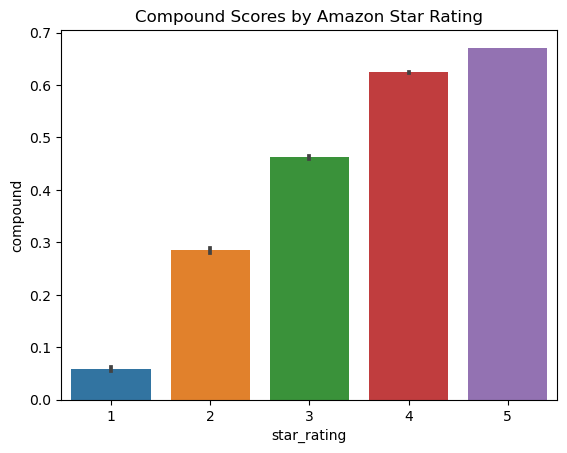

In [49]:
import matplotlib.pyplot as plt

graph = sns.barplot(data = review_file, x = 'star_rating', y = 'compound')
graph.set_title('Compound Scores by Amazon Star Rating')
plt.show()

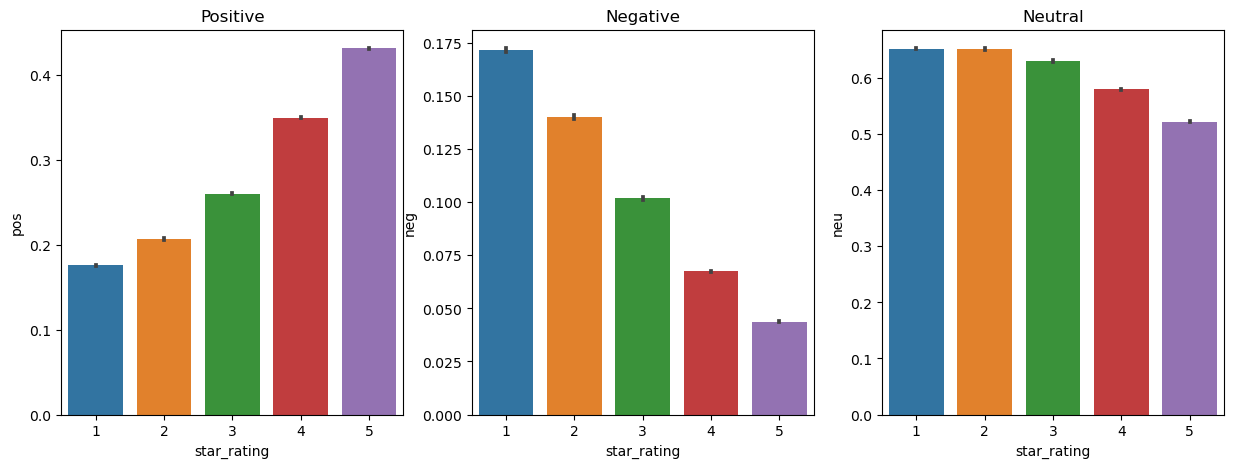

In [51]:
fig, graphs = plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(data = review_file, x = 'star_rating', y = 'pos', ax = graphs[0])
sns.barplot(data = review_file, x = 'star_rating', y = 'neg', ax = graphs[1])
sns.barplot(data = review_file, x = 'star_rating', y = 'neu', ax = graphs[2])
graphs[0].set_title('Positive')
graphs[1].set_title('Negative')
graphs[2].set_title('Neutral')
plt.show()

In [53]:
review_file.query('star_rating == 1').sort_values('pos', ascending = False)['review_body'].values[0]

"I wasn't impressed."

In [54]:
review_file.query('star_rating == 5').sort_values('neg', ascending = False)['review_body'].values[0]

'I cried, you will too.'

In [55]:
sent_counts = review_file['sentiment'].value_counts()
sent_counts

positive    1453452
negative     155316
neutral       76328
Name: sentiment, dtype: int64